# 03.2 - CatBoost. Upgraded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

In [3]:
# Define features and target
target_column = "deposit"
X = df.drop(columns=[target_column])
y = df[target_column]

In [4]:
# Identify categorical features (if any)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Initialize CatBoost classifier with default parameters
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    early_stopping_rounds=100,
    verbose=100
)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [500, 1000]
}

grid_search = GridSearchCV(cat_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train, cat_features=categorical_features)

0:	learn: 0.8187656	total: 116ms	remaining: 57.9s
100:	learn: 0.8205494	total: 315ms	remaining: 1.24s
200:	learn: 0.8298252	total: 560ms	remaining: 833ms
300:	learn: 0.8383874	total: 807ms	remaining: 534ms
400:	learn: 0.8487335	total: 1.08s	remaining: 268ms
499:	learn: 0.8555120	total: 1.34s	remaining: 0us
0:	learn: 0.8059222	total: 2.87ms	remaining: 1.43s
100:	learn: 0.8159115	total: 275ms	remaining: 1.08s
200:	learn: 0.8276846	total: 563ms	remaining: 838ms
300:	learn: 0.8401712	total: 852ms	remaining: 563ms
400:	learn: 0.8501605	total: 1.14s	remaining: 281ms
499:	learn: 0.8601498	total: 1.41s	remaining: 0us
0:	learn: 0.8174037	total: 3.36ms	remaining: 1.67s
100:	learn: 0.8248930	total: 284ms	remaining: 1.12s
200:	learn: 0.8298859	total: 573ms	remaining: 853ms
300:	learn: 0.8370185	total: 851ms	remaining: 563ms
400:	learn: 0.8459344	total: 1.14s	remaining: 281ms
499:	learn: 0.8534237	total: 1.41s	remaining: 0us
0:	learn: 0.8187656	total: 2.92ms	remaining: 1.46s
100:	learn: 0.8576525	t

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017AE5C02AC0>,
             param_grid={'depth': [4, 6, 8], 'iterations': [500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [8]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'depth': 4, 'iterations': 500, 'learning_rate': 0.05}


In [9]:
# Train the best model with optimized hyperparameters
best_cat_model = grid_search.best_estimator_

In [10]:
# Make predictions
y_pred = best_cat_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# results are the same as in the CatBoost model
# where we did not have any "imporvements"


Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       609
           1       0.87      0.84      0.86       443

    accuracy                           0.88      1052
   macro avg       0.88      0.88      0.88      1052
weighted avg       0.88      0.88      0.88      1052



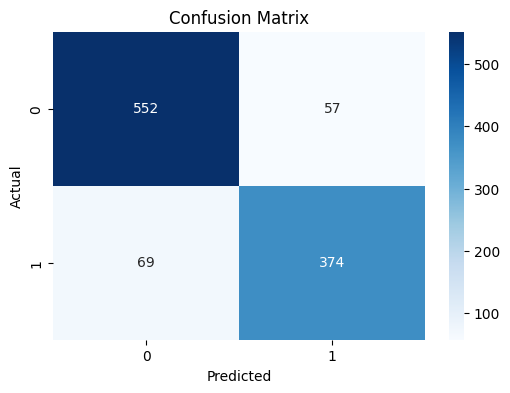

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# more or less the same results